# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [1.1 Data Exploration: df_train](#df_train_exploration)
    * [1.2 Data Exploration: df_test](#df_test_exploration)
    * [1.3 Data Exploration: df_full](#df_full_exploration)
    * [1.4 Function to calculate gold acquisition](#gold_acqt_function)
    * [Conclusions](#data_review_conclusions)
* [2. Data PreProcessing](#data_preprocessing)
    * [2.1 Analysis of Features Unavailable in the Test Set](#features_unavailable_test_set)
    * [Conclusions](#features_unavailable_test_set)
* [3. Splitting Data and Training Model](#splitting_training)
* [3. Exploratory Data Analysis](#eda)
    * [3.1 How the concentration of metals (Au, Ag, Pb) changes depending on the purification stage](#concentration_changes_purification)
    * [3.2 How the particle size distribution of the feed varies in both the training set and the test set](#particle_distribution)
    * [3.3 Considering the total concentration of all substances at different stages: raw feed, rougher concentrate, and final concentrate. If there are abnormal values in the total distribution, an analysis will be performed to determine whether it's necessary to remove these abnormal values from both samples](#abnormal_distribution)
* [4. Dataset Preparation](#dataset_preparation)
    * [4.1 removing_outliers](#outliers)
    * [4.2 Features Selection](#features_selection)
    * [4.3 Handling Missing Values](#missing_values)
    * [4.3 Handling Missing Values](#missing_values)
    * [4.4 Defining Features and Target](#defining_features_target)
    * [4.4 Split dataset](#split_dataset)
* [5. Creating a Machine Learning Model](#machine_learning_model)
    * [5.1 Creating Function](#function)
    * [5.2 Baseline](#baseline_model)
    * [5.3 Linear Regression Model](#lr_model)
    * [5.4 Decision Tree Regressor Model](#dtree_regressor_model)
    * [5.5 Random Forest Regressor Model](#rf_regressor_model)
* [6. Testing model on Test Set](#testing_test_set)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will prepare a prototype of a machine learning model for a Company that specializes in developing efficient solutions for heavy industries.
The model that will be created should be able to predict the amount of gold extracted or obtained from gold ore. Relevant data about the extraction and purification process of gold ore is available for you to use.


**Objective:**

The goal of this project is to predict the amount of gold extracted or obtained from gold ore. The model is expected to contribute to the creation of a more efficient production process and eliminate parameters that do not yield profits.

**This project will comprise the following steps:**

1. Data Overview
2. Splitting the Data
3. Assessing Model Quality
4. Hyperparameter Tuning

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

The steps to be performed are as follows:
1. Checking the number of rows and columns.
2. Checking for missing values.
3. Checking for duplicate data.
4. Checking statistical information in columns with numerical data types.
5. Checking values in columns with categorical data types.

[Back to Contents](#back)

In [1]:
# load library

# dataset
import pandas as pd, numpy as np

from numpy.random import RandomState

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# training model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

# ignore warning
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore")

In [2]:
# path dataset
path_df_train = 'data/gold_recovery_train.csv'
path_df_test = 'data/gold_recovery_test.csv'
path_df_full = 'data/gold_recovery_full.csv'

In [3]:
# load dataset
df_train = pd.read_csv(path_df_train)
df_test = pd.read_csv(path_df_test)
df_full = pd.read_csv(path_df_full)

### 1.1 Data Exploration: df_train

In [4]:
df_train.shape

(16860, 87)

In [5]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
# checking missing values
df_train.isnull().sum().sort_values(ascending=False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

In [8]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


**Conclusion for Dataset df_train**

1. Only the columns "date" and "primary_cleaner.input.feed_size" have no missing values. Other columns contain missing values.

### 1.2 Data Exploration: df_test

In [9]:
df_test.shape

(5856, 53)

In [10]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [12]:
# check missing values
df_test.isnull().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_f_air                17
secondary_cleaner.state.floatbank3_a_level     16


In [13]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


### 1.3 Data Exploration: df_full

df_full is a combination of df_train and df_test.

In [14]:
df_full.shape

(22716, 87)

In [15]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [16]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [17]:
df_full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [18]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [19]:
# The "date," being a unique value, can be used to match data between df_full and df_train
df_full[df_full['date'].isin(df_train['date'])].shape

(16860, 87)

In [20]:
# The "date," being a unique value, can be used to match data between df_full and df_test
df_full[df_full['date'].isin(df_test['date'])].shape

(5856, 87)

### 1.4 Function to calculate gold acquisition
In this stage, the training set (df_train) will be used, and the calculation will be performed for the feature rougher.output.recovery. The calculation will involve computing the Mean Absolute Error (MAE) between your calculation and the feature value.

To simulate the flotation process, the following formula will be used:

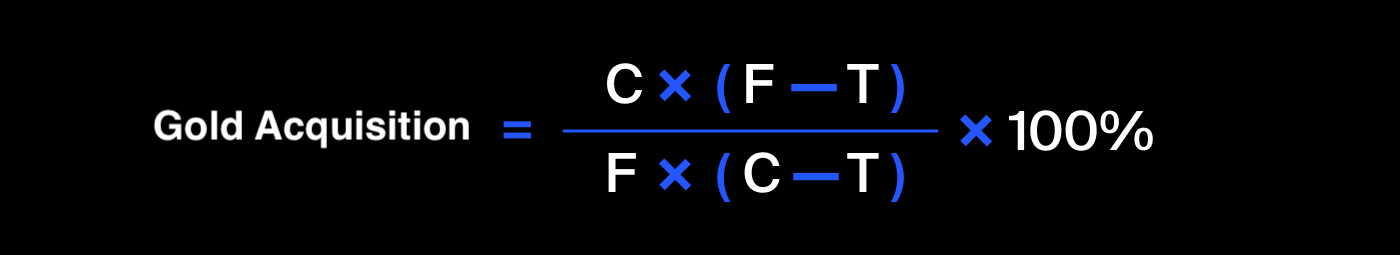

The explanation for each component is as follows:

C: the percentage of gold in the concentrate immediately after the flotation process (to determine the recovery of rougher concentrate) / after purification (to determine the final concentrate recovery).

If viewed from the diagram of the gold extraction process from gold ore, component C refers to point number 3 (output of the flotation process), where the output is the rougher concentrate - rougher.output.concentrate_au.

F: the percentage of gold in the feed before the flotation process (to determine the recovery of rougher concentrate) / in the concentrate right after the flotation process (to determine the final concentrate recovery).

If viewed from the diagram of the gold extraction process from gold ore, component F refers to point number 1 (feed for the flotation process) - rougher.input.feed_au.

T: the percentage of gold in the rougher tail, right after the flotation process (to determine the recovery of rougher concentrate) / after purification (to determine the final concentrate recovery).

If viewed from the diagram of the gold extraction process from gold ore, component T refers to point number 2 (feed for the flotation process) - rougher.output.tail_au.
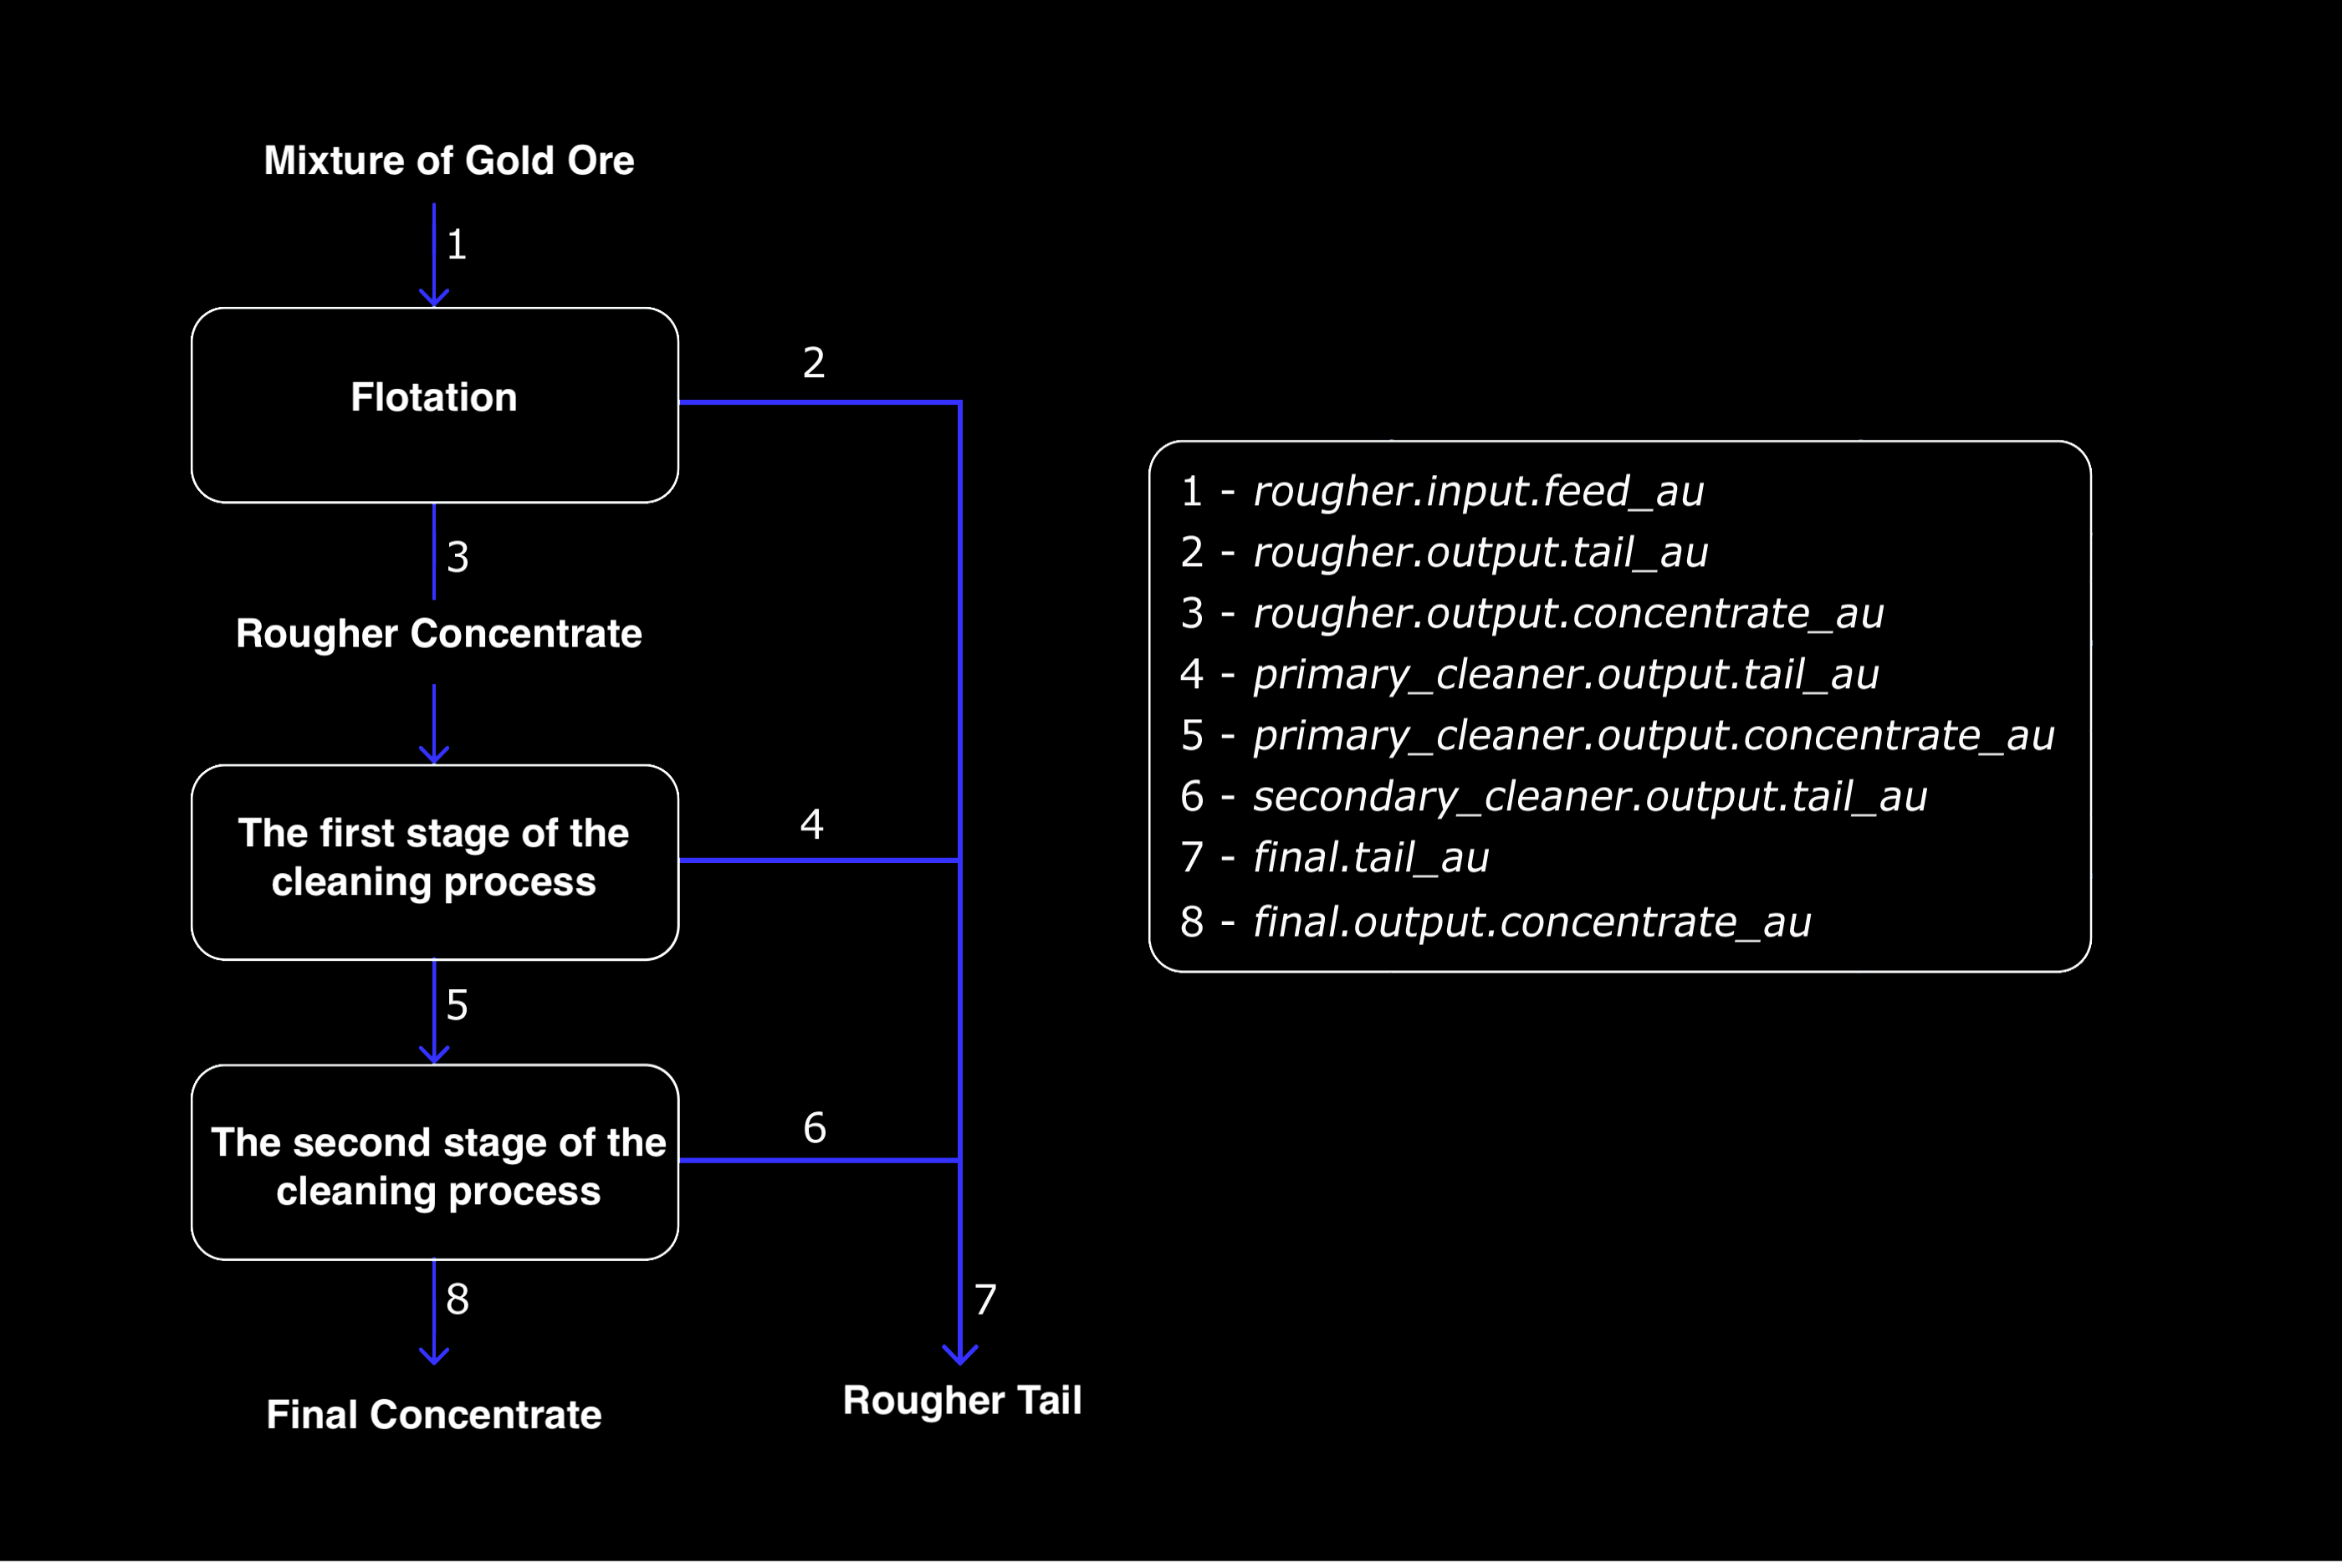

In [21]:
def gold_acqtn(row):
    numerator = row['rougher.output.concentrate_au'] * (row['rougher.input.feed_au'] - row['rougher.output.tail_au'])
    denominator = row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])
    return numerator / denominator * 100

In [22]:
# copy df_train dataset
df_calculation = df_train.copy()

In [23]:
# apply the function
df_calculation['result'] = gold_acqtn(df_calculation)
df_calculation['result']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: result, Length: 16860, dtype: float64

In [24]:
# check missing values for the new dataset
df_calculation[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

In [25]:
# filling in missing values in rougher.output.concentrate_au column
df_calculation['rougher.output.concentrate_au'] = df_calculation['rougher.output.concentrate_au'].fillna(0)

In [26]:
# filling in missing values in rougher.input.feed_au column
df_calculation['rougher.input.feed_au'] = df_calculation['rougher.input.feed_au'].fillna(0)

In [27]:
# filling in missing values in rougher.output.tail_au column
df_calculation['rougher.output.tail_au'] = df_calculation['rougher.output.tail_au'].fillna(0)

In [28]:
# verify missing values
df_calculation[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()

rougher.output.concentrate_au    0
rougher.input.feed_au            0
rougher.output.tail_au           0
dtype: int64

In [29]:
output_recovery_difference = (df_calculation['result'] - df_calculation['rougher.output.recovery']).abs().mean()

In [30]:
print('Difference between the expected and measured value is {}'.format(output_recovery_difference))

Difference between the expected and measured value is 9.303415616264301e-15


### Conclusion of Data Exploration Stage <a id='data_review_conclusions'></a>

**df_train**

1. Only the "date" and "primary_cleaner.input.feed_size" columns have no missing values. Other columns contain missing values.
2. With a total of 53 columns, while the df_train dataset has 87 columns, there are 37 columns that are not present in the df_test dataset.

**df_test**

1. Only the "date" and "primary_cleaner.input.feed_size" columns have no missing values. Other columns contain missing values.
2. With a total of 53 columns, while the df_train dataset has 87 columns, there are 37 columns that are not present in the df_test dataset.

**df_full**

1. Only the "date" and "primary_cleaner.input.feed_size" columns have no missing values. Other columns contain missing values.

**Function to calculate gold acqt**

From the output recovery difference, a very small value of 9.303415616264301e-15 is obtained. Therefore, it can be concluded that the formula used is correct as the difference is extremely minor, and the calculation for rougher.output.recovery is considered reliable.

[Back to Contents](#back)

## 2. Data Preprocessing # Contents <a id='data_preprocessing'></a>

### 2.1 Analysis of Features Unavailable in the Test Set

to know which features or columns that are present in the training set but are missing in the test set.

In [31]:
missed_test_columns = set(list(df_train.columns.values))-set(list(df_test.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [32]:
# Calculating the number of columns that are missing in the test set.
len(missed_test_columns)

34

**Analysis Result**

The target column 'final.output.recovery' is missing in the test set. This will result in an error during model training. In the next steps, this target column will be used for model training.

[Back to Contents](#back)

## 3. Exploratory Data Analysis # Contents <a id='eda'></a>

Three analysis processes will be conducted as follows:

1. How the concentration of metals (Au, Ag, Pb) changes depending on the purification stage.
2. How the particle size distribution of the feed varies in both the training set and the test set. If the distribution varies significantly, the model evaluation will be inaccurate.
3. Considering the total concentration of all substances at different stages: raw feed, rougher concentrate, and final concentrate. If there are abnormal values in the total distribution, an analysis will be performed to determine whether it's necessary to remove these abnormal values from both samples. The reasons and methods for eliminating these anomalies will be explained.

### 3.1 How the concentration of metals (Au, Ag, Pb) changes depending on the purification stage # Contents <a id='concentration_changes_purification'></a>

In [33]:
# Process in the purification stage
purification_stage = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

In [34]:
# Creating a function for generating plots for each process
def plot_concentrate_progress(component):
    steps = [s.format(component) for s in purification_stage]
    for step in steps:
        df_full[step].hist(alpha = 0.3, bins=25, figsize=(10,5))
    plt.legend(steps)

Text(0.5, 1.0, 'Change in Gold Concentration at Each Purification Stage.')

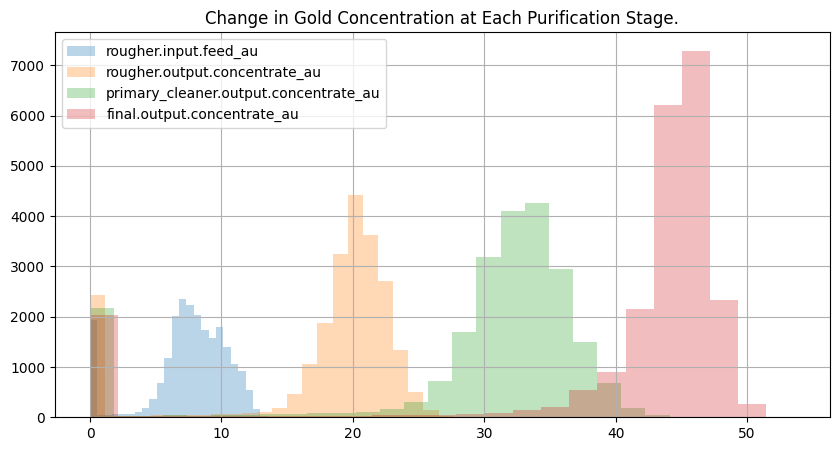

In [35]:
plot_concentrate_progress('au')
plt.title('Change in Gold Concentration at Each Purification Stage.')

Text(0.5, 1.0, 'Change in Silver Concentration at Each Purification Stage')

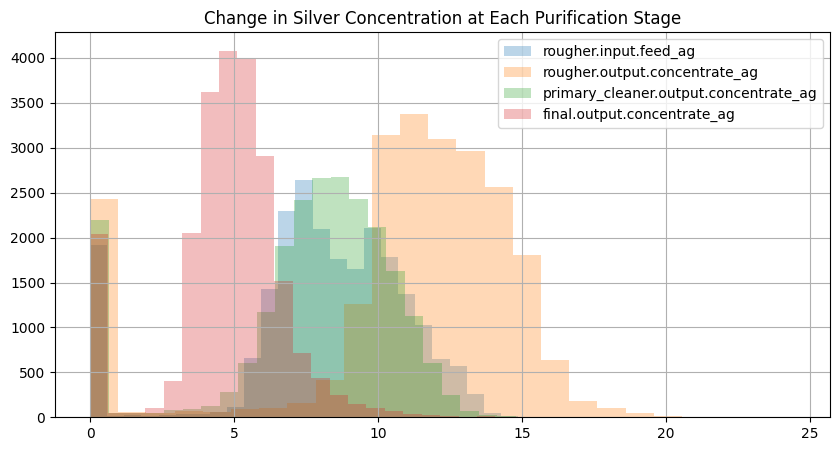

In [36]:
plot_concentrate_progress('ag')
plt.title('Change in Silver Concentration at Each Purification Stage')

Text(0.5, 1.0, 'Change in Lead Concentration at Each Purification Stage.')

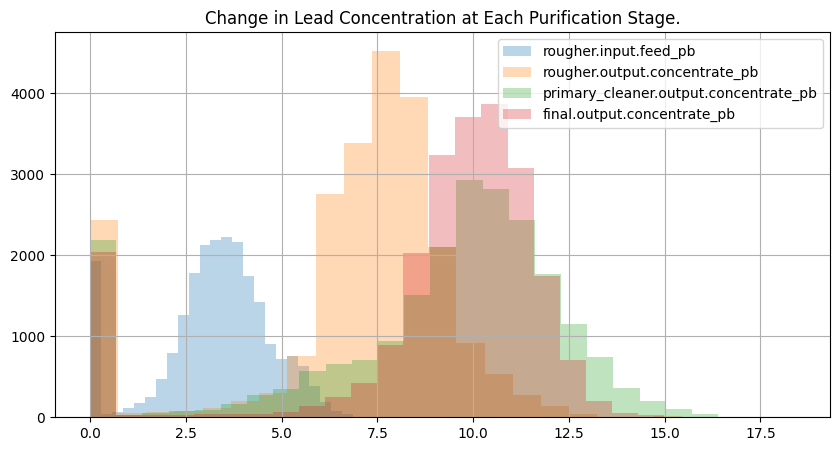

In [37]:
plot_concentrate_progress('pb')
plt.title('Change in Lead Concentration at Each Purification Stage.')

**Analysis Results**

1. The Gold (Au) component exhibits varying data distribution for each stage, with the highest concentration value in the final.output.concentrate stage.

2. The Silver (Ag) component displays a relatively centralized data distribution, with the highest concentration value in the final.output.concentrate stage.

3. The Lead (Pb) component also demonstrates a relatively centralized data distribution, with the highest concentration value in the rougher.output.concentrate stage.

### 3.2 How the particle size distribution of the feed varies in both the training set and the test set # Contents <a id='particle_distribution'></a>

In [38]:
# function to filter outliers
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

# Creating a function for comparing the distribution of feed particle sizes.
def particle_sizes_train_test_df(feature):
    filter_outliers(df_train[feature]).plot.kde()
    filter_outliers(df_test[feature]).plot.kde()
    plt.legend(['train', 'test'])

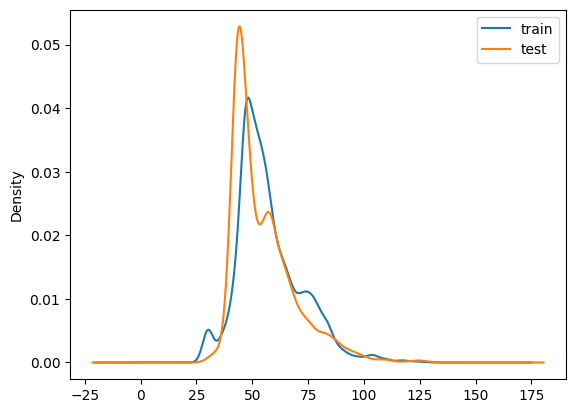

In [39]:
particle_sizes_train_test_df('rougher.input.feed_size')

<Axes: ylabel='Density'>

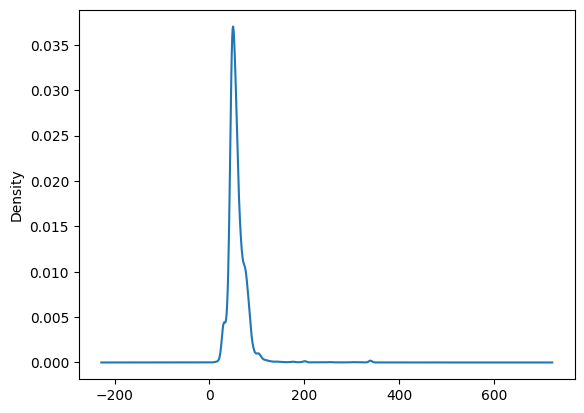

In [40]:
df_train['rougher.input.feed_size'].plot.kde()

<Axes: ylabel='Density'>

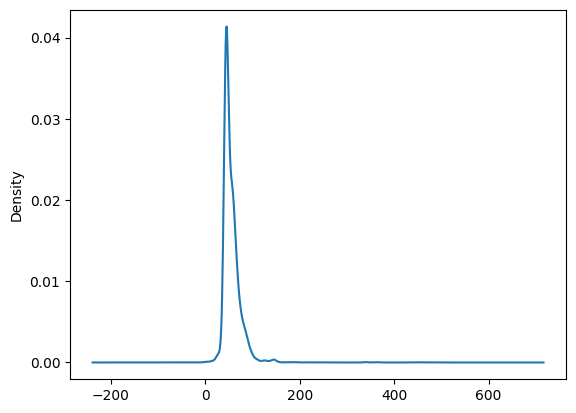

In [41]:
df_test['rougher.input.feed_size'].plot.kde()

**Analysis Result**

From the above diagram, it can be observed that between df_test and df_train, there is a fairly similar density distribution for the rougher.input.feed_size feed particle size.

### 3.3 Considering the total concentration of all substances at different stages: raw feed, rougher concentrate, and final concentrate. If there are abnormal values in the total distribution, an analysis will be performed to determine whether it's necessary to remove these abnormal values from both samples # Contents <a id='abnormal_distribution'></a>

#### 3.3.1 Raw Feed Concentration

In [42]:
rougher_input_concentration = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol'
]

<Axes: >

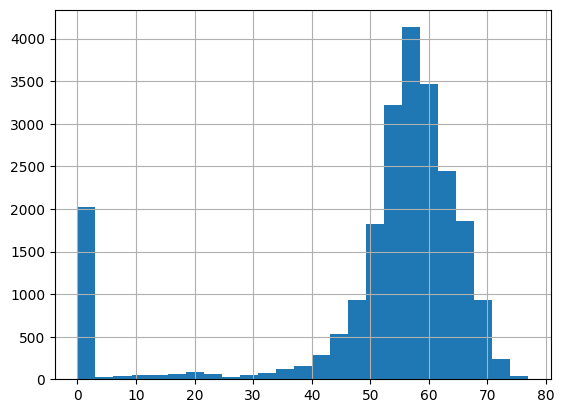

In [43]:
# visualizing in histogram
df_full[rougher_input_concentration].sum(1).hist(bins=25)

<Axes: >

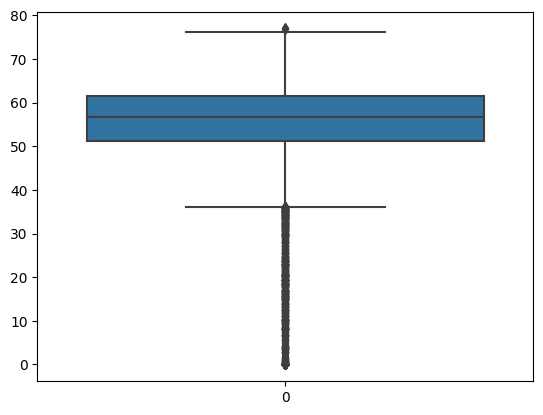

In [44]:
# visualizing in boxplot
sns.boxplot(df_full[rougher_input_concentration].sum(1))

#### 3.3.2 Rougher Concentrate Concentration

In [45]:
rougher_output_concentration = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol'
]

<Axes: >

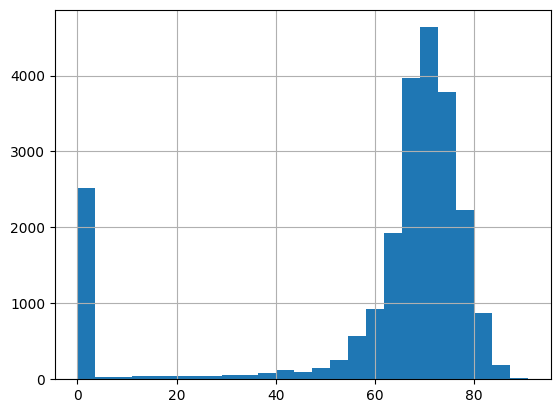

In [46]:
# visualizing in histogram
df_full[rougher_output_concentration].sum(1).hist(bins=25)

<Axes: >

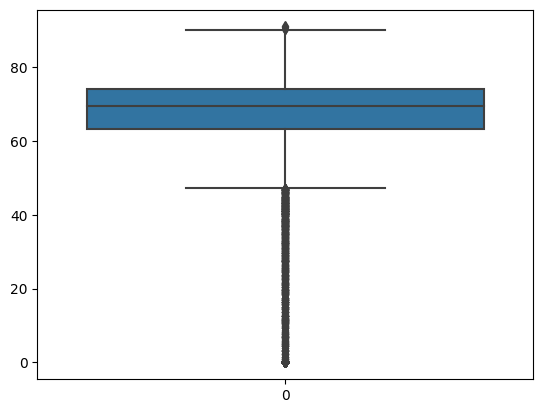

In [47]:
# visualizing in boxplot
sns.boxplot(df_full[rougher_output_concentration].sum(1))

#### 3.3.3 Final Concentration

In [48]:
final_output_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol'
]

<Axes: >

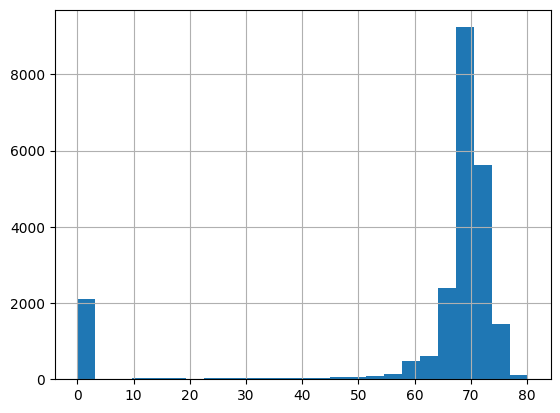

In [49]:
# visualizing in histogram
df_full[final_output_concentrate].sum(1).hist(bins=25)

<Axes: >

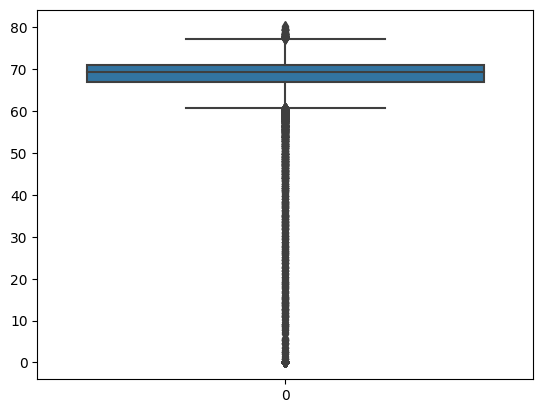

In [50]:
# visualizing in boxplot
sns.boxplot(df_full[final_output_concentrate].sum(1))

**Analysis Result**

1. The concentration data in all three stages exhibit anomalies, with a significant number of data points being 0.
2. Data points with a value of 0 will be removed, as they can be considered as outliers.

[Back to Contents](#back)

## 4. Dataset Preparation # Contents <a id='dataset_preparation'></a>

### 4.1 Removing Outliers # Contents <a id='outliers'></a>

In [51]:
boundary = 0.01

In [52]:
# In the case of df_test, since its columns are not available, the columns from df_full will be used.
df_full_test = df_full[df_full['date'].isin(df_test['date'])].reset_index(drop=True)
df_test = df_test[df_full_test[rougher_input_concentration].sum(1) > boundary]
df_test = df_test[df_full_test[rougher_output_concentration].sum(1) > boundary]
df_test = df_test[df_full_test[final_output_concentrate].sum(1) > boundary]

In [53]:
# checking the columns and rows
df_test.shape

(5278, 53)

**Analysis Result**

1. In df_train, the number of rows before removing outliers was 16,860, and it became 15,096 after removing outliers. A total of 1,764 data points were removed, approximately 10% of the data.
2. In df_test, the number of rows before removing outliers was 5,856, and it became 5,278 after removing outliers. A total of 578 data points were removed, approximately 10%.

### 4.2 Features Selection # Contents <a id='features_selection'></a>

In [54]:
# Correlation with the target column rougher.output.recovery.
df_corr = df_full.loc[:, df_full.columns != 'date']

In [55]:
df_corr.corr()['rougher.output.recovery'].sort_values(ascending=False)

rougher.output.recovery             1.000000
rougher.output.concentrate_ag       0.654141
rougher.output.concentrate_sol      0.612460
rougher.output.concentrate_au       0.588931
rougher.output.concentrate_pb       0.555882
                                      ...   
secondary_cleaner.output.tail_au   -0.110560
primary_cleaner.output.tail_au     -0.175566
rougher.output.tail_ag             -0.218839
rougher.output.tail_pb             -0.304381
rougher.output.tail_au             -0.357016
Name: rougher.output.recovery, Length: 86, dtype: float64

In [56]:
# filter the value where is above 0.3
df_corr.corr()['rougher.output.recovery'][df_corr.corr()['rougher.output.recovery']>0.3]

final.output.recovery             0.327059
rougher.output.concentrate_ag     0.654141
rougher.output.concentrate_pb     0.555882
rougher.output.concentrate_sol    0.612460
rougher.output.concentrate_au     0.588931
rougher.output.recovery           1.000000
Name: rougher.output.recovery, dtype: float64

In [57]:
# filter the value where is below - 0.3
df_corr.corr()['rougher.output.recovery'][df_corr.corr()['rougher.output.recovery']<-0.3]

rougher.output.tail_pb   -0.304381
rougher.output.tail_au   -0.357016
Name: rougher.output.recovery, dtype: float64

**Analysis Result**

Based on this feature selection step, we will only use variables for which the correlation value is below -0.3 or above 0.3.
below -0.3
1. rougher.output.recovery & rougher.output.tail_pb : -0.30
2. rougher.output.recovery & rougher.output.tail_au: -0.35

above 0.3
1. rougher.output.recovery & final.output.recovery : 0.32
2. rougher.output.recovery & rougher.output.concentrate_ag : 0.65
3. rougher.output.recovery & rougher.output.concentrate_pb : 0.55
4. rougher.output.recovery & rougher.output.concentrate_sol : 0.61
5. rougher.output.recovery & rougher.output.concentrate_au : 0.58

### 4.3 Handling Missing Values in target variables # Contents <a id='missing_values'></a>

### 4.3.1 df_test

In [58]:
# retrieve all columns
columns_used = df_test.columns.values.tolist()

In [59]:
# adding target variable
columns_used.append('rougher.output.recovery')
columns_used.append('final.output.recovery')

In [60]:
columns_used

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

### 4.3.2 fix_df_train

In [61]:
fix_df_train = df_train[columns_used]

In [62]:
# Removing missing values in the target column.
fix_df_train = fix_df_train[fix_df_train['rougher.output.recovery'].notnull()].reset_index(drop=True)
fix_df_train = fix_df_train[fix_df_train['final.output.recovery'].notnull()].reset_index(drop=True)

In [63]:
fix_df_train.shape, df_test.shape

((14149, 55), (5278, 53))

**Analysis Result**

1. There is still a difference in the number of columns between fix_df_train and df_test, with a difference of 2 columns.
2. The columns that are missing in df_test are rougher.output.recovery and final.output.recovery.
3. In this case, machine learning modeling cannot be performed yet due to the difference in the number of columns.

### 4.3.3 Merging fix_df_train and df_tets

In [64]:
# fix_df_train and df_test
fix_df_full = pd.concat([fix_df_train, df_test])

In [65]:
# checking missing values in target variable
fix_df_full.isnull().mean().sort_values(ascending=False)

final.output.recovery                         0.271684
rougher.output.recovery                       0.271684
rougher.input.floatbank11_xanthate            0.023524
rougher.state.floatbank10_e_air               0.022443
secondary_cleaner.state.floatbank2_a_air      0.011324
rougher.input.feed_size                       0.007464
primary_cleaner.input.xanthate                0.005250
rougher.input.feed_sol                        0.005250
rougher.input.feed_pb                         0.005147
rougher.input.floatbank11_sulfate             0.002059
rougher.input.floatbank10_sulfate             0.001853
primary_cleaner.input.depressant              0.001853
secondary_cleaner.state.floatbank2_b_air      0.001132
primary_cleaner.input.sulfate                 0.001132
rougher.input.feed_rate                       0.000772
secondary_cleaner.state.floatbank3_a_air      0.000618
rougher.input.floatbank10_xanthate            0.000463
secondary_cleaner.state.floatbank4_a_air      0.000309
primary_cl

In [66]:
# Creating a function to fill missing values using the median (except for the columns final.output.recovery and rougher.output.recovery)
for col in fix_df_full.isnull().mean().sort_values(ascending=False)[2:-2].index:
    median = fix_df_full[col].median()
    fix_df_full[col] = fix_df_full[col].fillna(median)

In [67]:
# checking missing values in target variable
fix_df_full.isnull().mean().sort_values(ascending=False)

final.output.recovery                         0.271684
rougher.output.recovery                       0.271684
secondary_cleaner.state.floatbank3_b_air      0.000000
rougher.state.floatbank10_d_level             0.000000
rougher.state.floatbank10_e_air               0.000000
rougher.state.floatbank10_e_level             0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank2_a_air      0.000000
secondary_cleaner.state.floatbank2_a_level    0.000000
secondary_cleaner.state.floatbank2_b_air      0.000000
secondary_cleaner.state.floatbank2_b_level    0.000000
secondary_cleaner.state.floatbank3_a_air      0.000000
secondary_cleaner.state.floatbank3_a_level    0.000000
secondary_cleaner.state.floatbank3_b_level    0.000000
rougher.state.floatbank10_c_level             0.000000
secondary_cleaner.state.floatbank4_a_air      0.000000
secondary_cleaner.state.floatbank4_a_level    0.000000
secondary_

In [68]:
# Separation of df_test_final and df_train_final
# Separating df_test using a filter on the target column with null values
df_test_final = fix_df_full[fix_df_full['rougher.output.recovery'].isnull()]

# drop target column
df_test_final = df_test_final.drop(columns=['rougher.output.recovery', 'final.output.recovery'])

# Separating df_train using a filter on the target column with non-null values.
df_train_final = fix_df_full[fix_df_full['rougher.output.recovery'].notnull()].reset_index(drop=True)

In [69]:
df_test_final.isnull().mean().sort_values(ascending=False)

date                                          0.0
rougher.state.floatbank10_c_air               0.0
rougher.state.floatbank10_d_air               0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_f_level             0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_air      0.0
secondary_cleaner.state.floatbank3_b_level    0.0
secondary_cleaner.state.floatbank4_a_air      0.0
secondary_cleaner.state.floatbank4_a_level    0.0
secondary_cleaner.state.floatbank4_b_air      0.0
secondary_cleaner.state.floatbank4_b_level    0.0


In [70]:
df_train_final.isnull().mean().sort_values(ascending=False)

date                                          0.0
secondary_cleaner.state.floatbank3_b_air      0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_f_level             0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_level    0.0
rougher.state.floatbank10_c_level             0.0
secondary_cleaner.state.floatbank4_a_air      0.0
secondary_cleaner.state.floatbank4_a_level    0.0
secondary_cleaner.state.floatbank4_b_air      0.0
secondary_cleaner.state.floatbank4_b_level    0.0
secondary_cleaner.state.floatbank5_a_air      0.0


**Analysis Result**

1. The columns final.output.recovery and rougher.output.recovery have the highest number of missing values.
2. However, this is due to the missing values in df_test (after merging).
3. Therefore, missing value imputation will not be performed for these two columns.

### 4.4 Defining Features and Target <a id='defining_features_target'></a>

In [71]:
# Removing the "date" column 
features = df_test_final.drop(columns=['date']).columns.values
# defining target
target = ['rougher.output.recovery', 'final.output.recovery']

#### 4.4.1 Train Set

In [72]:
df_train_final.isnull().sum().sort_values(ascending=False)

date                                          0
secondary_cleaner.state.floatbank3_b_air      0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_level    0
rougher.state.floatbank10_c_level             0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air      0
secondary_cleaner.state.floatbank5_a_lev

In [73]:
# Separation of features and target in the train set.
features_train = df_train_final[features].reset_index(drop=True)
target_train = df_train_final[target].reset_index(drop=True)
target_train.columns = [0,1]

In [74]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [75]:
target_train.head()

,0,1
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


#### 4.4.2 Test Set

In [76]:
features_test = df_test_final[features].reset_index(drop=True)
target_test = df_full[df_full['date'].isin(df_test_final['date'])][target].reset_index(drop=True)
target_test.columns = [0,1]

In [77]:
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [78]:
target_test.head()

,0,1
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


### 4.5 Split df_test_final and df_train_final <a id='split_dataset'></a>

In [79]:
# splitting df_test by using a filter on the target column with null values.
df_test_final = fix_df_full[fix_df_full['rougher.output.recovery'].isnull()]
# drop target variable
df_test_final = df_test_final.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
# splitting df_train by using a filter on the target column with non-null values.
df_train_final = fix_df_full[fix_df_full['rougher.output.recovery'].notnull()].reset_index(drop=True)

In [80]:
df_test_final.shape, df_train_final.shape

((5278, 53), (14149, 55))

In [81]:
# checking missing values
df_train_final.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [82]:
# checking missing values
df_test_final.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

**Analysis Result**

After performing the missing value imputation process on fix_df_full and splitting df_train_final and df_test_final, there are no longer any missing values in both datasets.

[Back to Contents](#back)

## 5. Creating a Machine Learning Model <a id='machine_learning_model'></a>

In this stage, the following steps will be performed:

1. Creation of a function to calculate the final sMAPE.
2. Model training and evaluation using cross-validation. The best model will be selected.

The values to be predicted are as follows:

1. Rougher Concentrate Recovery (rougher.output.recovery)
2. Final Concentrate Recovery (final.output.recovery)

**Evaluation Metric**

In this case, the evaluation metric used will be sMAPE (Symmetric Mean Absolute Percentage Error), which represents the symmetric average absolute percentage error.

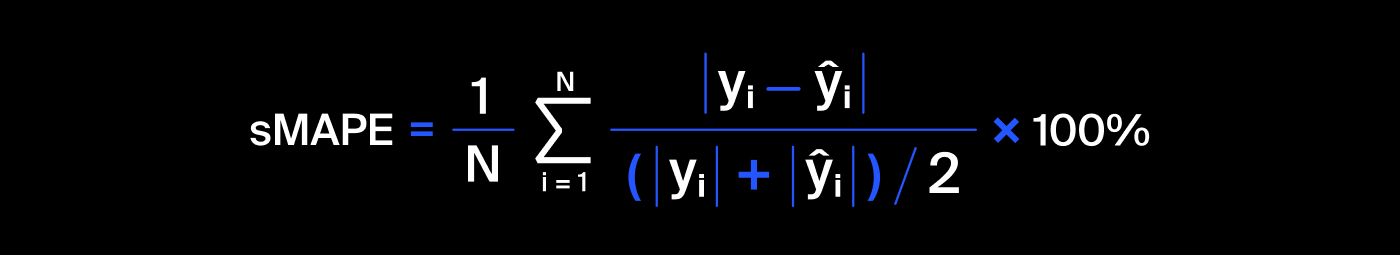

The final metric to be used as follows:

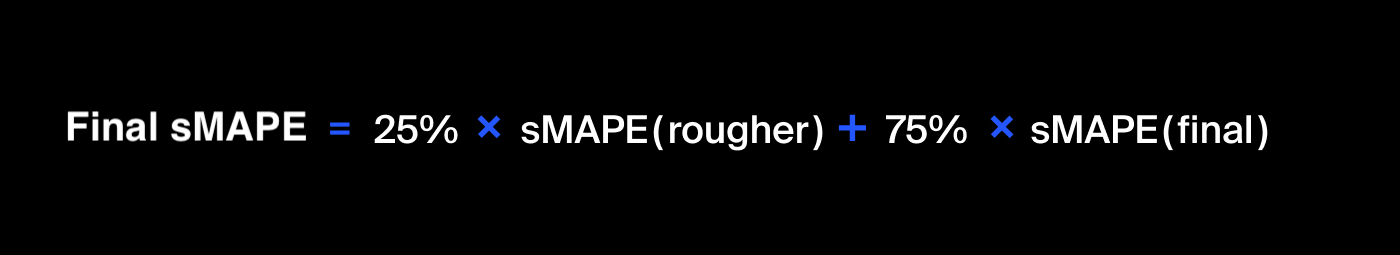

### 5.1 Creating function <a id='function'></a>

#### 5.1.1 sMAPE function

In [83]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) /2
    
    return (error/scale).mean() * 100

#### 5.1.2 final sMAPE function

In [84]:
def final_smape(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])
    
    return (0.25 * rougher) + (0.75 * final)

### 5.1.3 training model function

In [85]:
def score_model(model, cv=4):
    score = []
    
    for subtrain_index, valid_index in KFold(n_splits = cv).split(features_train):
        
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        
        features_valid = features_train.loc[subtrain_index].reset_index(drop=True)
        target_valid = target_train.loc[subtrain_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        
        score.append(final_smape(target_valid, pred_valid))
        
    return pd.Series(score).mean()

In [86]:
features_train.isnull().sum().sort_values(ascending=False)

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air

In [87]:
target_train.isnull().sum().sort_values(ascending=False)

0    0
1    0
dtype: int64

### 5.2 Baseline <a id='baseline_model'></a>

In [88]:
pred_median = target_train.copy()

In [89]:
# target train
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(final_smape(target_train, pred_median))

11.11896739710436


In [90]:
pred_median = target_test.copy()

In [91]:
# target test
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(final_smape(target_test, pred_median))

7.52521641405902


### 5.3 Linear Regression Model <a id='lr_model'></a>

In [92]:
model = LinearRegression()
lr_score = score_model(model)
print("Linear Regression Score:", lr_score)

Linear Regression Score: 9.1602480176294


### 5.4 Decision Tree Regressor Model <a id='dtree_regressor_model'></a>

In [93]:
for depth in range(40,55):
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dtree_score = score_model(model)
    print("At depth", depth, "DecisionTreeRegressor score is ", dtree_score)

At depth 40 DecisionTreeRegressor score is  0.008916610091699414
At depth 41 DecisionTreeRegressor score is  0.006257608804022437
At depth 42 DecisionTreeRegressor score is  0.004024286608623779
At depth 43 DecisionTreeRegressor score is  0.0023631892030224716
At depth 44 DecisionTreeRegressor score is  0.0012922965246162262
At depth 45 DecisionTreeRegressor score is  0.0006791169591803654
At depth 46 DecisionTreeRegressor score is  0.0002980795990904945
At depth 47 DecisionTreeRegressor score is  0.00010934403990517987
At depth 48 DecisionTreeRegressor score is  1.5797074169366908e-05
At depth 49 DecisionTreeRegressor score is  2.8141420682101164e-19
At depth 50 DecisionTreeRegressor score is  2.8141420682101164e-19
At depth 51 DecisionTreeRegressor score is  2.8141420682101164e-19
At depth 52 DecisionTreeRegressor score is  2.8141420682101164e-19
At depth 53 DecisionTreeRegressor score is  2.8141420682101164e-19
At depth 54 DecisionTreeRegressor score is  2.8141420682101164e-19


### 5.5 Random Forest Model <a id='rf_regressor_model'></a>

In [94]:
max_depth_list = [40]
n_estimator_list = [50, 100]

for depth in max_depth_list:
    for n_estimator in n_estimator_list:
        model = RandomForestRegressor(max_depth = depth, n_estimators = n_estimator, random_state = 42)
        rf_score = score_model(model)
        print("At depth", depth, "and n_estimator", n_estimator, "RF score is:", rf_score, end='')
        print()

At depth 40 and n_estimator 50 RF score is: 3.600285954325542
At depth 40 and n_estimator 100 RF score is: 3.597851678748087


**Analysis Result**

The lowest sMAPE value in the train set is achieved by the DecisionTreeRegressor model with max_depth = 49, resulting in a score of 2.8141420682101164e-19 or 0.00000000000000000028141420682101164.
However, the result represents overfitting on the training model. Hence, we will use RandomForestRegressor instead to implement on Test Set. At depth 40 and n_estimator 100, the final smape score is 3.59.

**Interpretation of the sMAPE Value:**

The Symmetric Mean Absolute Percentage Error (sMAPE) is a metric used to measure the accuracy of a predictive model. It calculates the percentage difference between the actual and predicted values, and then averages these differences symmetrically. 

In the context of my analysis, a sMAPE value of 3.59 indicates that, on average, the model's predictions have an error of approximately 3.59%. This means that the model's predictions are, on average, within 3.59% of the actual values. Lower sMAPE values indicate better model performance, as they represent a smaller average percentage error between predictions and actual values.

[Back to Contents](#back)

## 6. Testing model on Test Set <a id='testing_test_set'></a>

In [97]:
model = RandomForestRegressor(max_depth=40, n_estimators= 100, random_state=42)
model.fit(features_train, target_train)

pred = pd.DataFrame(model.predict(features_train))
print("train:", final_smape(target_train, pred))

pred = pd.DataFrame(model.predict(features_test))
print("test:", final_smape(target_test, pred))

train: 3.6243215751273645
test: 8.544402388079245


[Back to Contents](#back)

# General Conclusions <a id='end'></a>

1. When using the baseline (using median), the final sMAPE values are as follows:

   - Train: 11.11
   - Test: 7.52

2. During the training process, three models were applied as follows:

    a. Linear Regression, resulting in a final sMAPE score of 9.16

    b. Decision Tree Regressor with max_depth = 40, resulting in a score of 0.008916610091699414

    c. RandomForestRegressor with max_depth = 40 and n_estimators = 100, resulting in a score of 3.597851678748087
    
3. Despite the lowest sMAPE result when using the decision tree regressor model, overfitting actually occurred when applied to the test set. Therefore, the RandomForestRegressor with max_depth 40 and n_estimators 100 was chosen to be applied to the test dataset.
4. The final sMAPE value on the test set is 8.544402388079245.

[Back to Contents](#back)